<a href="https://colab.research.google.com/github/YMKO-lab/End-to-End-Recommendation-System-for-Medicine/blob/main/end_to_end_recommendation_system_for_medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recommendation systems for medicine can be used in a number of different contexts, including helping patients choose the most appropriate treatment options, assisting healthcare providers in selecting the best course of action for their patients, and identifying potential drug interactions or contraindications. They can also be used to optimize the use of medical resources, such as identifying the most cost-effective treatment options or reducing unnecessary testing and procedures.

There are several approaches that can be used to build a recommendation system for medicine, including collaborative filtering, content-based filtering, and hybrid systems that combine both approaches. Collaborative filtering relies on the ratings or preferences of similar users to make recommendations, while content-based filtering uses the characteristics of the item being recommended to make recommendations. Hybrid systems can combine both approaches to provide more accurate and personalized recommendations.



#**Step 0: Import Libraries**

In [ ]:
!pip install -U scikit-learn

import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#**Step 1: Import Data**

There 3 files in the archive file, but the one we will be looking at is the "medicine description"

In [ ]:
# load the data frame from the csv file
df = pd.read_csv("/content/drive/MyDrive/Data for ML DeepLearning AI/medicine.csv")

df.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [ ]:
# check for missing values
df.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

#**Step 2: Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        9720 non-null   int64 
 1   Drug_Name    9720 non-null   object
 2   Reason       9720 non-null   object
 3   Description  9720 non-null   object
dtypes: int64(1), object(3)
memory usage: 303.9+ KB


"Drug_Name", "Reason", and "Description". The table has a total of 9720 rows, and each row represents a record with information about a drug. The "Drug_Name" column contains the name of the drug, the "Reason" column contains the reason for prescribing the drug, and the "Description" column contains a description of the drug. The data type for each column is also indicated as "object".

In [ ]:
# check the shape of the dataframe
df.shape

(9720, 4)

In [ ]:
# Check for duplicated 
df.duplicated().sum()

0

### Feature: Drug_name

In [ ]:
# Check how many different drug names are in the dataset
len(df.Drug_Name.unique())

9626

In [ ]:
df['Drug_Name'].value_counts().head(15)

Wounsol Ointment 15gm                                                                                                                                                                                                                                                                               2
Zidovudine 300mg Tablet 10'S                                                                                                                                                                                                                                                                        2
Zimivir 1000mg Tablet 3'SZimivir 500mg Tablet 3'S                                                                                                                                                                                                                                                   2
Zosovir 400mg Tablet 28'S                                                                                             

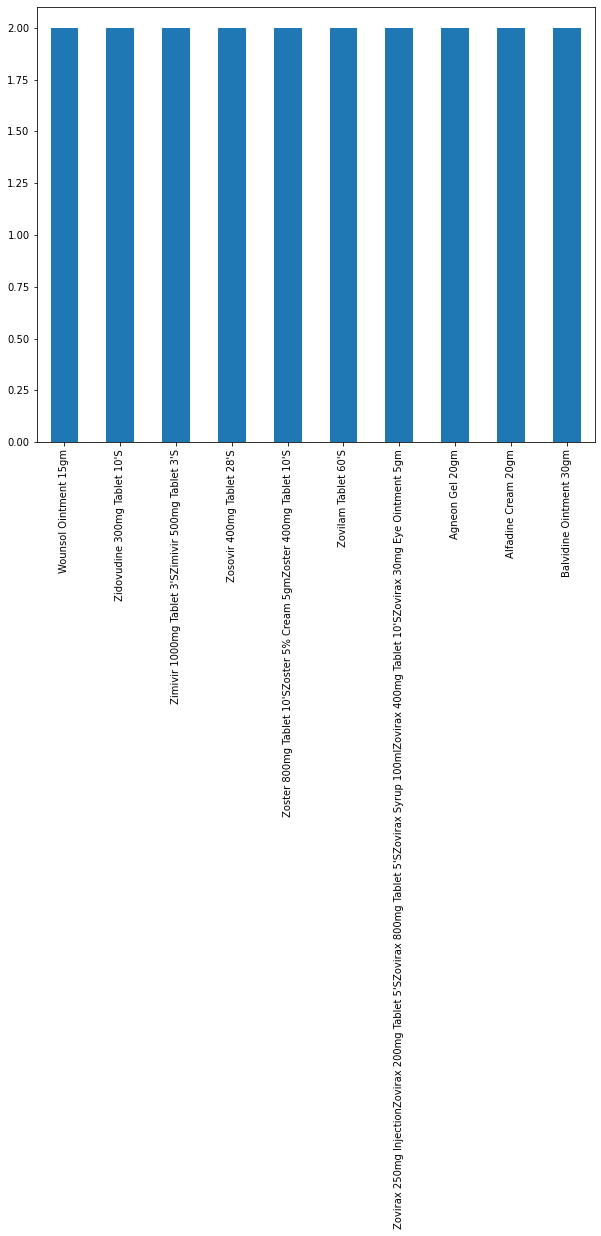

In [ ]:
# The top 10 drug names
df.Drug_Name.value_counts().head(10).plot(kind="bar", figsize=(10,8))

### Feature: Reason

In [ ]:
# check how many different Reasons are in the dataset
len(df.Reason.unique())

50

In [ ]:
# top 10 Reasons are:
df.Reason.value_counts().head(10)

Hypertension    2505
Infection       1109
Pain            1072
Fungal           509
Anaemia          252
General          243
Angina           219
Acne             204
Allergies        203
Glaucoma         197
Name: Reason, dtype: int64

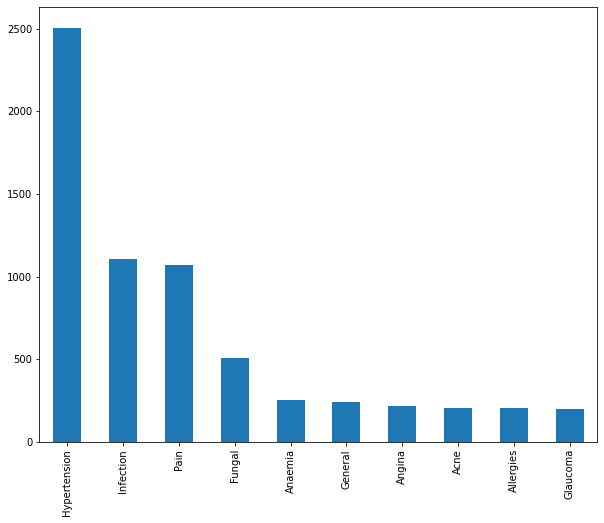

In [ ]:
# visualize the 10 top ten reason
df.Reason.value_counts().head(10).plot(kind="bar", figsize=(10, 8))

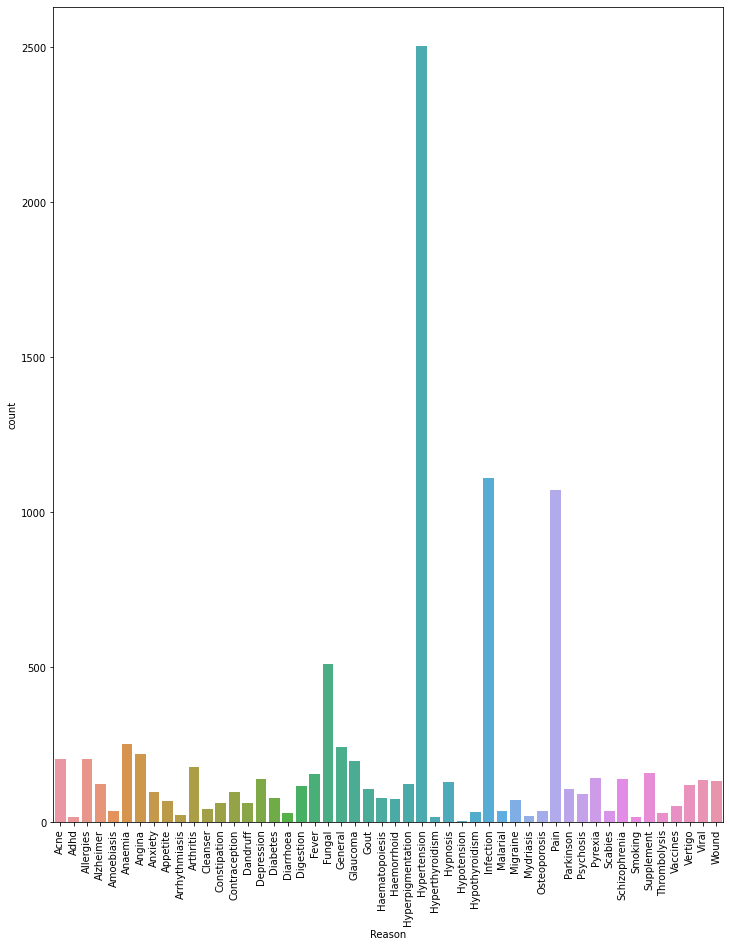

In [ ]:
# visualization of all the "Reasons"


plt.figure(figsize=(12, 15))
sns.countplot(x="Reason", data=df)
plt.xticks(rotation=90)
plt.show()

### Feature: Description

In [ ]:
# check how many different Descriptions
len(df.Description.unique())

290

In [ ]:
# top 10 descriptions are:
df.Description.value_counts().head(10)

lower high blood pressure (hypertension)                                                                                                       578
lowerÂ chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)                     578
used for treating high blood pressure (essential hypertension) in adults                                                                       445
Â treat high blood pressure (hypertension) and a type of chest pain called angina                                                              444
slow the worsening of diabetic kidney disease (nephropathy) in patients with type 2 diabetes who have or had high blood pressure               241
infection during surgery                                                                                                                       186
urinaryÂ tract and kidneys                                                                                            

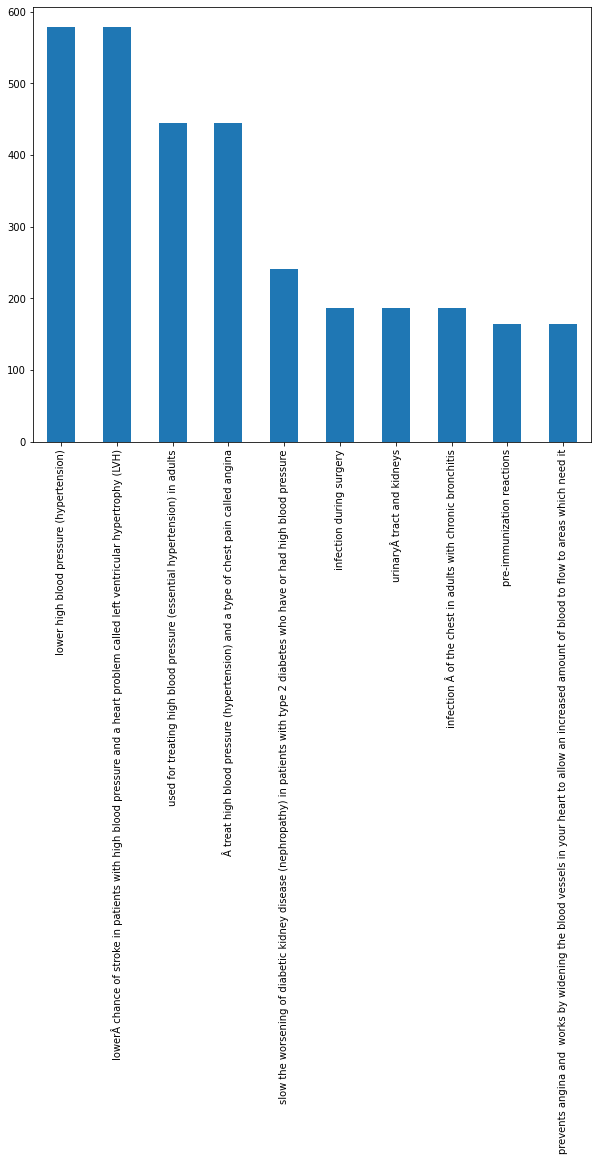

In [ ]:
# visualize the 10 top ten Description
df.Description.value_counts().head(10).plot(kind="bar", figsize=(10, 8))

#**Step 3: Feature Engineering**

In this section we are going to process categorical from textual.

Instead of processing the whole texts, we can split it into single words and try to find the ones with most occurrences.





In [ ]:
df["Description"][0]

'Mild to moderate acne (spots)'

In [ ]:
df["Description"][0].split(" ")

['Mild', 'to', 'moderate', 'acne', '(spots)']

In [ ]:
# split Description column into list of individual words
df["Description"] = df["Description"].apply(lambda x:x.split(" "))

In [ ]:
# split Reason column into individual words
df["Reason"] = df["Reason"].apply(lambda x:x.split(" "))

In [ ]:
# view the dataset
df.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,[Acne],"[Mild, to, moderate, acne, (spots)]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,[Acne],"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,[Acne],"[treat, the, most, severe, form, of, acne, (no..."


In [ ]:
df["Description"] = df["Description"].apply(lambda x:[i.replace(" ","") for i in x])
df["Description"] = df["Description"].apply(lambda x:[i.replace(" ","") for i in x])
# the lambda function is defined inline and takes a single parameter,
# 'x' which represents each element in the "Description" column.
# the function then uses a list comprehension to iterate over each word in 'x'
# and apply the 'replace' method to all spaces with an empty string.

# the resulting dataframe will have the same number of rows and the same structure as before,
# but each elementin the "Description" column will be a list of words with no spaces.

In [ ]:
df.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,[Acne],"[Mild, to, moderate, acne, (spots)]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,[Acne],"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,[Acne],"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,[Acne],"[treat, the, most, severe, form, of, acne, (no..."


In [ ]:
# combining the "Description" column with "Reason" column.
df["Description_Reason"] = df["Description"]+df["Reason"]

In [ ]:
df_new = df[["Drug_Name", "Description_Reason"]]
df_new.head()

,Drug_Name,Description_Reason
0,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."


In [ ]:
df_new["Description_Reason"] = df_new["Description_Reason"].apply(lambda x:" ".join(x))

# The lambda function then calls the " ".join(x) method on 'x' 
# to concatenate all the strings in the list using a space character as a separator.

In [ ]:
df_new.head()

,Drug_Name,Description_Reason
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
df_new["Description_Reason"] = df_new["Description_Reason"].apply(lambda x:x.lower())

# The lambda() function'lower' method on 'x' to convert the string to lowercase
# The resulting string is returned by the lambda function.

In [ ]:
ps_stemmer = PorterStemmer()
ps_lemmatize = WordNetLemmatizer()

In [ ]:
def porter_step(text):
    list_stem=[]
    for i in text.split():
        list_stem.append(ps_lemmatize.lemmatize(i))
    return " ".join(list_stem)

# This function takes a string of words and returns a new string with each word
# replaced by its lemma.

# 1st, the function 'porter_step' takes a single input 'text'
# the function the creates an empty list 'list_stem' which is used to store
# the stemmed versions of the words in 'text'.

# 2nd, the function creates a for loop to iterate through each word in 'text'.
# The for loop is using the 'split()' method on 'text', which splits the string
# into a list of individual words based on the space

# 3rd, for each iteration of the for loop the function uses the 'lemmatize()'
# method from the 'ps_lemmatize' object on the current word.

# 4th, the function uses the 'join()' method to join all of the lemmas in 
# 'list_stem' into a single string, separated by a space character.

In [ ]:
df_new["Description_Reason"] = df_new["Description_Reason"].apply(porter_step)

In [ ]:
df_new.head()

,Drug_Name,Description_Reason
0,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...


In [ ]:
def porter_stemmer(text):
    list_stem=[]
    for i in text.split():
        list_stem.append(ps_stemmer.stem(i))
    return " ".join(list_stem)

# this function takes a string of words and returns a new string with each 
# word replaced by its stemmed version.  

In [ ]:
df_new["Description_Reason"] = df_new["Description_Reason"].apply(porter_stemmer)

In [ ]:
df_new.head()

,Drug_Name,Description_Reason
0,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moder acn (spots) acn
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescript medicin that is us...
2,ACGEL CL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
3,ACGEL NANO Gel 15gm,it is use to treat acn vulgari in peopl 12 yea...
4,Acleen 1% Lotion 25ml,treat the most sever form of acn (nodular acne...


**The CountVectorizer and TfidfVectorizer classes from the sklearn.feature_extraction.text module are used to convert text into numerical feature vectors that can be used as input to machine learning models.**

CountVectorizer and TfidfVectorizer both create a vocabulary of words from the text and then encode the text as a numerical feature vector based on this vocabulary. The difference between the two is that CountVectorizer encodes the text as a count of the number of occurrences of each word in the vocabulary, while TfidfVectorizer encodes the text as a weighted count where the weight of each word is determined by its term frequency-inverse document frequency (TF-IDF) value.

TF-IDF is a statistical measure that reflects the importance of a word in a document within a collection of documents. Words that occur frequently in a single document but not in many documents throughout the collection are considered more important and are given a higher weight.

Both CountVectorizer and TfidfVectorizer can be used to preprocess text data for use in machine learning models. They allow the model to work with text data in a way that is more meaningful than just treating each word as a separate feature.

To use either CountVectorizer or TfidfVectorizer, you will need to create an instance of the class and then call the fit_transform() method on your text data. The fit_transform() method fits the vectorizer to the text data and then returns the encoded feature vectors. You can then use the feature vectors as input to your machine learning model.

In [ ]:
cv = CountVectorizer(stop_words="english", max_features=5000)

# 'CountVectorizer' class from sklearn.feature_extraction.text

# 'stop_words': This parameter specifies a list of stop words (common words that should be ignored)
# to be used by the vectorizer. 
# the 'stopwords' is set to "english", the vectorizer will use the default list of English stop words
# provided by sklearn.

In [ ]:
vectors = cv.fit_transform(df_new["Description_Reason"]).toarray()

In [ ]:
# check the shape of the vector
vectors.shape

(9720, 806)

In [ ]:
cosine_similarity(vectors)

array([[1.        , 0.25197632, 0.43643578, ..., 0.        , 0.        ,
        0.        ],
       [0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
        0.0860663 ],
       [0.43643578, 0.25660012, 1.        , ..., 0.11111111, 0.0860663 ,
        0.0993808 ],
       ...,
       [0.        , 0.19245009, 0.11111111, ..., 1.        , 0.77459667,
        0.2981424 ],
       [0.        , 0.1490712 , 0.0860663 , ..., 0.77459667, 1.        ,
        0.34641016],
       [0.        , 0.0860663 , 0.0993808 , ..., 0.2981424 , 0.34641016,
        1.        ]])

In [ ]:
similarity = cosine_similarity(vectors)

In [ ]:
def recommend(medicine):
  medicine_index = df_new[df_new["Drug_Name"] == medicine].index[0]
  distances = similarity[medicine_index]
  medicines_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]

  for i in medicines_list:
    print(df_new.iloc[i[0]].Drug_Name)

#**Save Mode**

In [ ]:
import pickle


In [ ]:
pickle.dump(df_new.to_dict(),open('medicine_dict.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))